# **1.0 Introduction**

[Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic) is one of the machice learning competitions on Kaggle. In general, the Kaggle's machice learning competitions are a fun, structured way to practice applying skills to real-world problems. Hence, this notebook was used for the Titanic competition to develop a machine learning model that predicts which people survived the Titanic shipwreck.

**Data Dictionary:**

* `Survived` is the survival of Titanic passengers.
 * 0 = Not Survived
 * 1 = Survived
* `Pclass` is ticket class 
 * 1 = 1st Class
 * 2 = 2nd Class 
 * 3 = 3rd Class
* `Sex` is gender of Titanic passengers. 
* `Age` is the age in years 
* `SibSp` is the number of siblings / spouses aboard the Titanic. 
* `Parch` is the number of parents / children aboard the Titanic. 
* `Ticket` is the ticket number 
* `Fare` is the passenger fare 
* `Cabin` is the cabin number
* `Embarked` is the port of Embarkation 
    * C = Cherbourg, 
    * Q = Queenstown 
    * S = Southampton

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
import random

sns.set_style('whitegrid')
plt.rcParams['figure.figsize']=(10,5)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# **1.1 Load Data**

In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

print(train.info())
print('\n')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   P

* Training set has **891** passengers, while testing set has **418** passengers.
* Training set has **12** features, while testing set has **11** features.
* **Survived** is an additional feature in training set.

# **2.0 Exploratory Data Analysis & Feature Engineering**

In [3]:
# Combine training and testing to the entire dataset
entire_df = train.append(test).reset_index(drop=True)

entire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


* The entire dataset has **1309** passengers.

In [4]:
entire_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
entire_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
# Check entries for each column (full dataset)
for col in entire_df.columns:
    print('{}:\n{}\n'.format(col, entire_df[col].unique()))

PassengerId:
[   1    2    3 ... 1307 1308 1309]

Survived:
[ 0.  1. nan]

Pclass:
[3 1 2]

Name:
['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' ... 'Saether, Mr. Simon Sivertsen'
 'Ware, Mr. Frederick' 'Peter, Master. Michael J']

Sex:
['male' 'female']

Age:
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]

SibSp:
[1 0 3 4 2 5 8]

Parch:
[0 1 2 5 3 4 6 9]

Ticket:
['A/5 21171' 'PC 17599' 'STON/

In [7]:
# Check duplicate rows
print('Duplicate rows for entire dataset: {} \n'.format(entire_df.duplicated().sum()))

Duplicate rows for entire dataset: 0 



# **2.1 Missing Values**

Text(0.5, 1.0, 'Test Dataset: Missing Values')

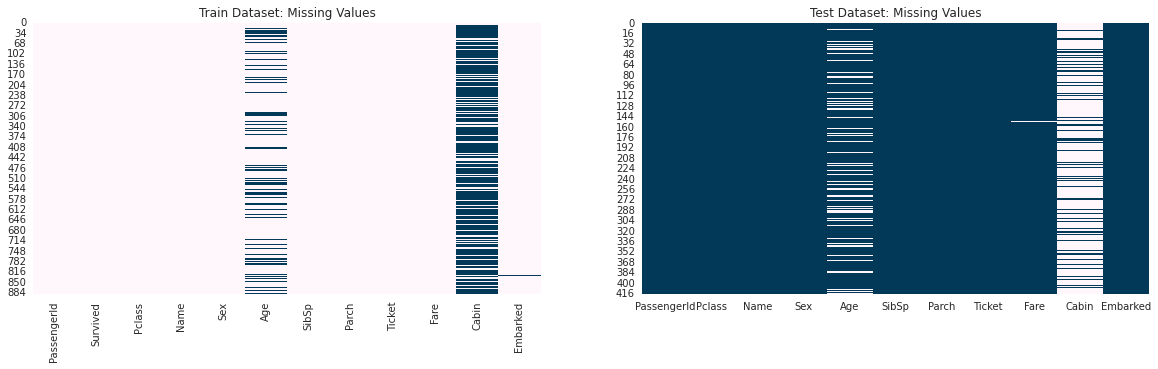

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.heatmap(train.isnull(), cbar=False, cmap='PuBu',ax=ax[0])
ax[0].set_title('Train Dataset: Missing Values')
sns.heatmap(test.isnull(), cbar=False, cmap='PuBu_r',ax=ax[1])
ax[1].set_title('Test Dataset: Missing Values')

* In the training set, the features `Age`, `Cabin`, and `Embarked` have missing values.
* In the testing set, the features `Age`, `Cabin` and `Fare` have missing values.

In [9]:
# Show missing values for the entire dataset
def missing_tbl(df):
    tbl = pd.DataFrame()
    
    tbl['Column'] = df.columns
    tbl['Missing'] = [df[col].isnull().sum() for col in df.columns]
    tbl['Percentage'] = [round((df[col].isnull().sum() / df.shape[0])*100, 2) for col in df.columns]
    return tbl


missing_tbl(entire_df)

,Column,Missing,Percentage
0,PassengerId,0,0.00
1,Survived,418,31.93
2,Pclass,0,0.00
3,Name,0,0.00
4,Sex,0,0.00
5,Age,263,20.09
6,SibSp,0,0.00
7,Parch,0,0.00
8,Ticket,0,0.00
9,Fare,1,0.08


* According to the entire dataset:
 * **20.09%** of the `Age` values are missing. 
 * **0.08%** of the `Fare` values are missing. 
 * **77.46%** of the `Cabin` values are missing.
 * **0.15%** of the `Embarked` values are missing.

# **2.1.0 Age**

Text(0.5, 1.0, 'Age Distribution')

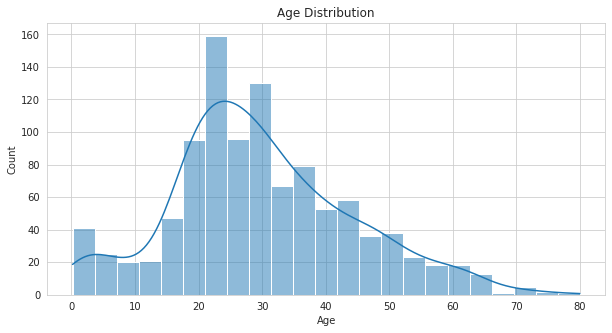

In [10]:
sns.histplot(data=entire_df['Age'], kde=True)
plt.title('Age Distribution')

* The `Age` distribution is **right skewed**. (**Median** imputation will be used) 
* This shows that there are more younger passengers.
* Most values are clustered around the left tail of the distribution, with the longer right tail.
* mode < median < mean

In [11]:
# Create Title column by extracting title from Name column
def create_title(df):
    df = df.copy()
    df['Title'] = df['Name'].str.split(', ', expand=True)[1]
    df['Title'] = df['Title'].str.split('.', expand=True)[0]
    return df


entire_df = create_title(entire_df)

In [12]:
# Check entries for Title column
print('Entire dataset:\n{}\n'.format(entire_df['Title'].unique()))

Entire dataset:
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']



| Title | Description | 
| --- | --- | 
| **Mlle** | Title used for an unmarried female in French |
| **Ms** | Title used for a women of uncertain marital status |
| **Dona** | Title used for a married or widowed woman in Spanish |
| **Mme** | Title used for a married woman |
| **Countess & Lady** | Title used for a woman who is married to a count or earl |
| **Master** | Title used for a boys before the age of 12 |
| **Don** | Title used for a man in Spanish | 
| **Rev** | Title used for an officially appointed Christian religious leader |
| **Jonkheer** | Title used for a middle-aged, young, unmarried child of a high-ranking knight or nobleman |
| **Col** | Title used for a senior military officer |
| **Major** | Title used for a military officer |
| **Capt** | Title used for a serving officer in the Army, Airforce, or Marines with a rank one below Major |

In [13]:
# Standardized Title column
def standardized_title(df):
    df = df.copy()
    
    # Unmarried woman
    unmarried_w = ['Mlle', 'Ms']
    for uw in unmarried_w:
        df['Title'].replace({uw : 'Miss'}, inplace=True)
    
    # Married woman
    married_w = ['Dona', 'Mme', 'Lady', 'the Countess']
    for mv in married_w:
        df['Title'].replace({mv : 'Mrs'}, inplace=True)
    
    # Man
    man = ['Don', 'Rev', 'Capt', 'Col', 'Major', 'Jonkheer', 'Sir']
    for m in man:
        df['Title'].replace({m : 'Mr'}, inplace=True)
        
    return df


# Apply function
entire_df = standardized_title(entire_df)

In [14]:
entire_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [15]:
# Compute the correlation between Age and Numerical Features to obtain a more accurate median Age
def num_corr(feature):
    df_corr = entire_df.corr().round(4).abs().unstack().sort_values(ascending=False).reset_index()
    df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
    return df_corr[df_corr['Feature 1'] == feature]

num_corr('Age')

,Feature 1,Feature 2,Correlation Coefficient
5,Age,Age,1.0000
9,Age,Pclass,0.4081
18,Age,SibSp,0.2437
22,Age,Fare,0.1787
25,Age,Parch,0.1509
30,Age,Survived,0.0772
42,Age,PassengerId,0.0288


In [16]:
# Compute the correlation between Age and Categorical Features
from pandas import factorize

def cat_corr(feature):
    categories = ['Sex', 'Title', 'Embarked']
    print('Correlation between {} and Categorical Features:'.format(feature))
    for cat in categories:
        labels, categories = factorize(entire_df[cat])
        entire_df['labels'] = labels
        correlation = abs(entire_df[feature].corr(entire_df['labels']))
        print('{} : {:.4f}'.format(cat, correlation))
        entire_df.drop('labels', axis=1, inplace=True)
        
cat_corr('Age')

Correlation between Age and Categorical Features:
Sex : 0.0636
Title : 0.3821
Embarked : 0.0424


* Based on correlation, `Pclass` and `Title` have **moderate positive** relationship with `Age`.

In [17]:
# Plot age distribution grouped by category
def age_hue_histplot(df, cat:list):
    fig, axs = plt.subplots(nrows=1, ncols=len(cat), figsize=(len(cat)*10, 5))
    axs = axs.flatten()
   
    for i, feature in enumerate(cat):
        ax = sns.histplot(data=df, x='Age', hue=feature, kde=True, palette='PuBu', ax=axs[i])
        median_age = df.groupby(feature)['Age'].median()
        for m in median_age:
            ax.axvline(x=m, ls='--', c='0.25')
        ax = axs[i].set_title('{} Distribution'.format(feature))

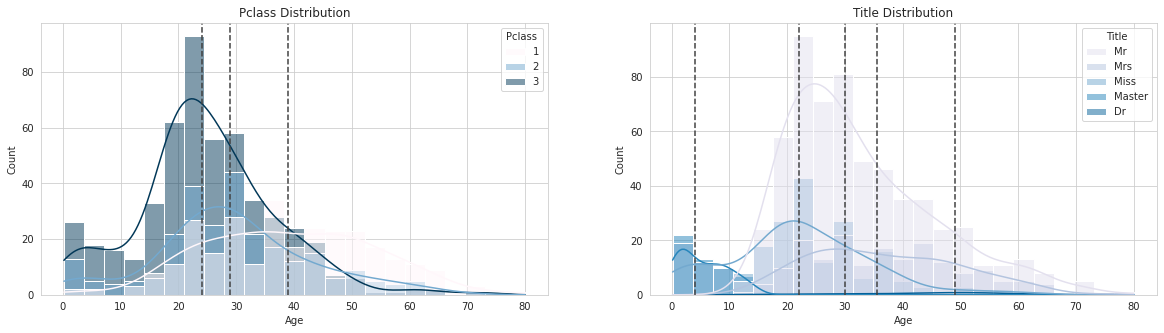

In [18]:
age_hue_histplot(entire_df, cat = ['Pclass', 'Title'])

* Based on the distribution, `Title` has **distinct** `Age` **median** than `Pclass`.
* Median age grouped by `Title` is used for **median** imputation.

In [19]:
median_age = entire_df.groupby('Title')['Age'].median()

print('Median age grouped by Title:')
median_age

Median age grouped by Title:


Title
Dr        49.0
Master     4.0
Miss      22.0
Mr        30.0
Mrs       35.5
Name: Age, dtype: float64

In [20]:
# Fill age with median 
def fill_age(title, age):
    if np.isnan(age): 
        return median_age.loc[title]
    else:
        return age

    
# Replace nan age with median age based on Title
entire_df['Age'] = entire_df.apply(lambda x : fill_age(x['Title'], x['Age']), axis=1)   

# **2.1.1 Fare**

In [21]:
# Compute the correlation between Fare and Numerical Features
num_corr('Fare')

,Feature 1,Feature 2,Correlation Coefficient
6,Fare,Fare,1.0000
7,Fare,Pclass,0.5586
15,Fare,Survived,0.2573
17,Fare,Parch,0.2215
21,Fare,Age,0.1778
24,Fare,SibSp,0.1602
39,Fare,PassengerId,0.0314


In [22]:
# Compute the correlation between Fare and Categorical Features
cat_corr('Fare')

Correlation between Fare and Categorical Features:
Sex : 0.1855
Title : 0.1450
Embarked : 0.0588


* Based on correlation, `Fare` and `Pclass` have a **moderately strong positive** relationship.

Text(0.5, 1.0, 'Fare Distribution based on Ticket Class')

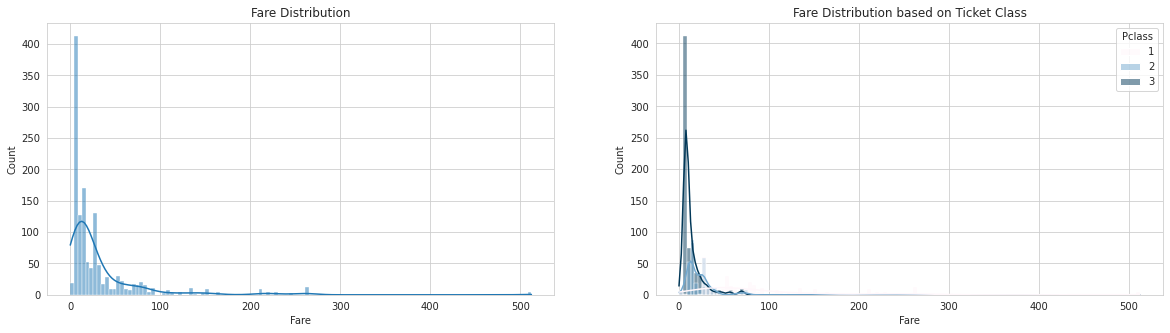

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))

sns.histplot(data=entire_df, x='Fare', kde=True, palette='PuBu', ax=ax[0])
ax[0].set_title('Fare Distribution')
sns.histplot(data=entire_df, x='Fare', hue='Pclass', palette='PuBu', kde=True, ax=ax[1])
ax[1].set_title('Fare Distribution based on Ticket Class')

* The `Fare` distribution is **right skewed**. 
* Median fare grouped by `Pclass` is used for **median** imputation.

In [24]:
# Fill fare with median 
def fill_fare(pclass, fare):
    median_fare = entire_df.groupby('Pclass')['Fare'].median()
    if np.isnan(fare):
        return median_fare.loc[pclass]
    else:
        return fare

# Replace nan Fare with median fare based on Pclass
entire_df['Fare'] = entire_df.apply(lambda x : fill_fare(x['Pclass'], x['Fare']), axis=1) 

# **2.1.2 Cabin** 

In [25]:
# Drop the Cabin column since missing values > 70% 
entire_df.drop(['Cabin'], axis=1, inplace=True)

# **2.1.3 Embarked** 

Text(0.5, 1.0, 'Pie Chart: Embarked')

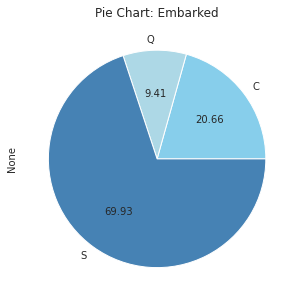

In [26]:
entire_df.groupby('Embarked').size().plot(kind='pie', autopct='%.2f', labeldistance=1.1, colors=['skyblue', 'lightblue', 'steelblue'])
plt.title('Pie Chart: Embarked')

In [27]:
# Embarked is a categorical variable
# Replace nan Embarked with mode
entire_df['Embarked'].fillna(entire_df['Embarked'].mode()[0], inplace=True)

# **2.2 Creating Feature - Family size**

In [28]:
entire_df['Fam'] = entire_df['SibSp'] + entire_df['Parch'] + 1

entire_df['Fam'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

In [29]:
entire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   object 
 11  Title        1309 non-null   object 
 12  Fam          1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


# **2.3 Feature Transformation**

In [30]:
train_df = (entire_df.iloc[0:891]).copy()
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Fam
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S,Mr,1
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S,Miss,1
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.45,S,Miss,4
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C,Mr,1
890,891,0.0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q,Mr,1


# **2.3.0 Sex**

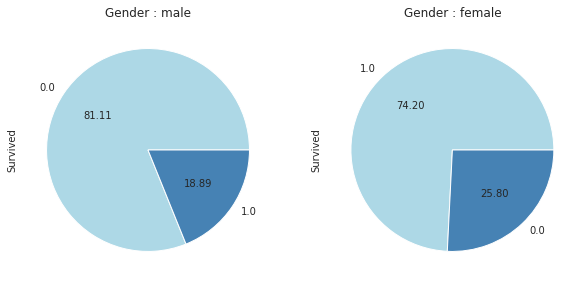

In [31]:
fig = plt.figure(figsize=(10,5))

i = 0
for gender in train_df['Sex'].unique():
    fig.add_subplot(1, 2, i+1)
    plt.title('Gender : {}'.format(gender))
    train_df.Survived[train_df['Sex'] == gender].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'steelblue'])
    i += 1

* **Female** passengers were **more likely to survive** than male passengers.
* **Rank Transformation** is used.
* Male is replaced with 0. 
* female  is replaced with 1.

In [32]:
gender_mapping = {'male':0,
                  'female':1}

train_df['Sex'] = train_df['Sex'].apply(lambda x : gender_mapping.get(x)) 

In [33]:
entire_df['Sex'] = entire_df['Sex'].apply(lambda x : gender_mapping.get(x))

# **2.3.1  Embarked**

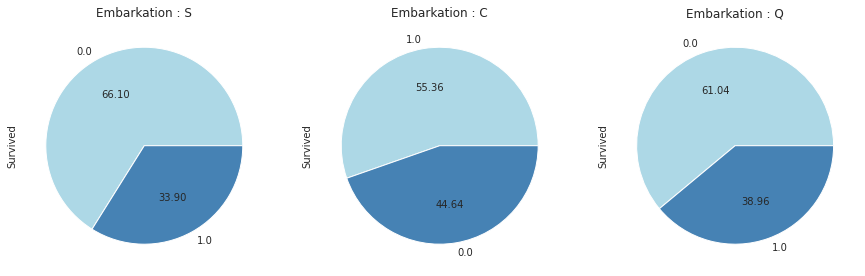

In [34]:
fig = plt.figure(figsize=(15,5))

i = 0
for embark in train_df['Embarked'].unique():
    fig.add_subplot(1, 3, i+1)
    plt.title('Embarkation : {}'.format(embark))
    train_df.Survived[train_df['Embarked'] == embark].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'steelblue'])
    i += 1

* The passengers embarked from **Cherbourg** are **more likely to survive**, followed by Queenstown and Southampton.
* **Rank Transformation** is used.
* Southampton is replaced with 0.
* Queenstown is replaced with 1.
* Cherbourg is replaced with 1.

In [35]:
embark_mapping = {'S':0,
                  'Q':1,
                  'C':2}

train_df['Embarked'] = train_df['Embarked'].apply(lambda x : embark_mapping.get(x)) 

In [36]:
entire_df['Embarked'] = entire_df['Embarked'].apply(lambda x : embark_mapping.get(x))

# **2.3.2 Title**

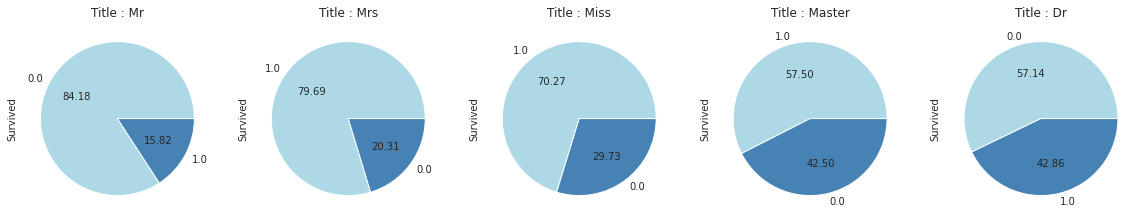

In [37]:
fig = plt.figure(figsize=(20,5))

i = 0
for title in train_df['Title'].unique():
    fig.add_subplot(1, 5, i+1)
    plt.title('Title : {}'.format(title))
    train_df.Survived[train_df['Title'] == title].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'steelblue'])
    i += 1

* The title of **Mrs** are **more likely to survive**, followed by Miss, Master, Dr, Mr.
* **Rank Transformation** is used.

In [38]:
title_mapping = {'Mr':0,
                 'Dr':1,
                 'Master':2,
                 'Miss':3,
                 'Mrs':4}

train_df['Title'] = train_df['Title'].apply(lambda x : title_mapping.get(x)) 

In [39]:
entire_df['Title'] = entire_df['Title'].apply(lambda x : title_mapping.get(x))

# **2.3.3  Fam**

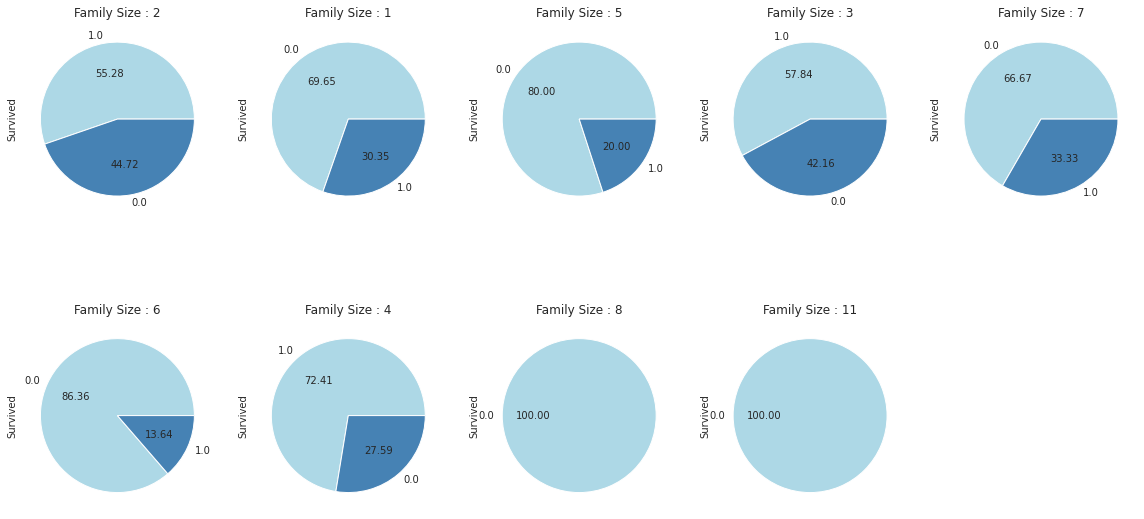

In [40]:
fig = plt.figure(figsize=(20,10))

i = 0
for fam in train_df['Fam'].unique():
    fig.add_subplot(2, 5, i+1)
    plt.title('Family Size : {}'.format(fam))
    train_df.Survived[train_df['Fam'] == fam].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'steelblue'])
    i += 1

* The **family size of 4** are **more likely to survive**, followed by 3, 2, 7, 1, 5, 6, 8 , 11.  
* **Rank Transformation** is used.

In [41]:
fam_mapping = {11:0,
               8:0,
               6:2,
               5:3,
               1:4,
               7:5,
               2:6,
               3:7,
               4:8}

train_df['Fam'] = train_df['Fam'].apply(lambda x : fam_mapping.get(x)) 

In [42]:
entire_df['Fam'] = entire_df['Fam'].apply(lambda x : fam_mapping.get(x))

In [43]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Fam
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,6
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2,4,6
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,3,4


# **2.4 Feature Encoding - Ordinal Encoder**

In [44]:
from sklearn.preprocessing import OrdinalEncoder

features = ['Name', 'Ticket']

for feat in features:
    entire_df[feat] = OrdinalEncoder().fit_transform(entire_df[feat].values.reshape(-1, 1))

# **2.5 Feature Scaling - MinMaxScaler**

In [45]:
from sklearn.preprocessing import MinMaxScaler

features = ['Name', 'Pclass', 'Age', 'Sex', 'Fare', 'SibSp', 'Parch', 'Ticket','Embarked', 'Fam', 'Title']

for feat in features:
    entire_df[feat] = MinMaxScaler().fit_transform(entire_df[feat].values.reshape(-1, 1))

In [46]:
entire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   float64
 3   Name         1309 non-null   float64
 4   Sex          1309 non-null   float64
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   float64
 7   Parch        1309 non-null   float64
 8   Ticket       1309 non-null   float64
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   float64
 11  Title        1309 non-null   float64
 12  Fam          1309 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 133.1 KB


In [47]:
entire_df.head(3) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Fam
0,1,0.0,1.0,0.118683,0.0,0.273456,0.125,0.0,0.775862,0.014151,0.0,0.00,0.75
1,2,1.0,0.0,0.218989,1.0,0.473882,0.125,0.0,0.879310,0.139136,1.0,1.00,0.75
2,3,1.0,1.0,0.400459,1.0,0.323563,0.000,0.0,0.984914,0.015469,0.0,0.75,0.50


<AxesSubplot:>

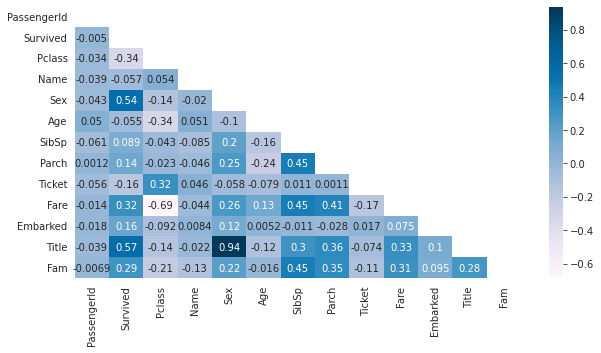

In [48]:
train_df = (entire_df.iloc[0:891]).copy()
corr_matrix = train_df.corr('spearman')
sns.heatmap(corr_matrix, cbar=True, annot=True,  mask = np.triu(np.ones_like(corr_matrix, dtype = bool)), cmap='PuBu')

# **3.0 Model Training**

Text(0.5, 1.0, 'Countplot of Survival')

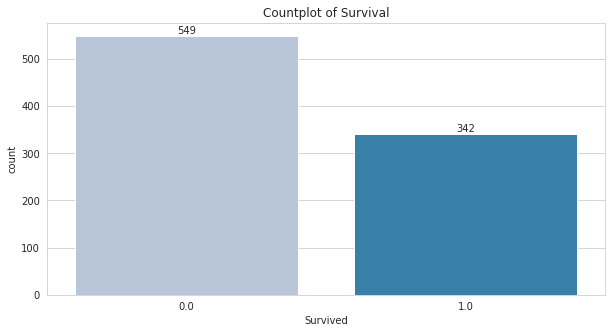

In [49]:
ax = sns.countplot(data=train_df, x='Survived', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Countplot of Survival')

* In the Titanic, more passengers had died than had survived, which shows that the data is **imbalanced**.
* **RandomForestClassifier**, **LogisticRegression with balanced class weight** and **ComplementNB** are selected for model training.
* **GridSearchCV** is used to obtain the best estimator and parameters.

In [50]:
# Set a global seed to obtain stable results
seed = 42

np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

In [51]:
X = train_df.copy()
y = X.pop('Survived')

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=seed)  


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB


# Create first pipeline for base 
from sklearn.pipeline import Pipeline
pipe = Pipeline([('classifier' , RandomForestClassifier(random_state=seed))])


# Get the best estimator via GridSearch
param_grid = [{'classifier' : [RandomForestClassifier(random_state=seed)],
               'classifier__max_depth' : np.arange(3, 20, 3),
               'classifier__min_samples_split' : np.arange(3, 20, 3),
               'classifier__min_samples_leaf' : np.arange(3, 20, 3)},
  
              {'classifier' : [LogisticRegression(random_state=seed, class_weight='balanced')],
               'classifier__penalty' : ['l1', 'l2'],
               'classifier__solver' : ['liblinear']},
           
              {'classifier' : [ComplementNB()],
               'classifier__alpha': [0.01, 0.1, 0.5, 1.0],
               'classifier__fit_prior': [True, False]}]


grid_search = GridSearchCV(pipe, param_grid=param_grid, n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.833857 using {'classifier': RandomForestClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=15,
                       random_state=42), 'classifier__max_depth': 9, 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 15}


# **3.1 Ramdom Forest**

In [52]:
# Re-train with the best estimator and parameters
rf_model = RandomForestClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=15, random_state=seed)
rf_model.fit(X_train, y_train)
rf_ypred = rf_model.predict(X_valid)

# **3.2 Feature Selection**

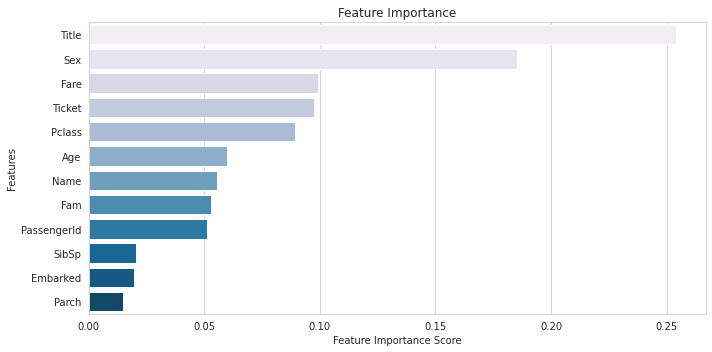

In [53]:
from sklearn.metrics import accuracy_score
feature_imp = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index, palette='PuBu')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.tight_layout()

* `Parch` has the lowest feature importance score, followed by`SibSp` and `Embarked`.

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       134
         1.0       0.84      0.74      0.79        89

    accuracy                           0.84       223
   macro avg       0.84      0.82      0.83       223
weighted avg       0.84      0.84      0.84       223

Confusion Matrix of Orginal model:


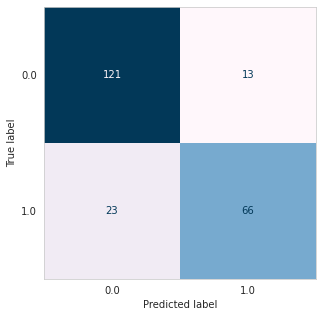

In [54]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print(classification_report(y_valid, rf_ypred))
print('Confusion Matrix of Orginal model:')
ConfusionMatrixDisplay.from_predictions(y_valid, rf_ypred, colorbar = False, cmap = 'PuBu')
plt.grid(False)

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87       134
         1.0       0.83      0.75      0.79        89

    accuracy                           0.84       223
   macro avg       0.84      0.82      0.83       223
weighted avg       0.84      0.84      0.84       223

Confusion Matrix of New model:


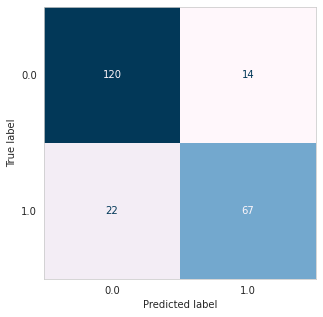

In [55]:
new_X_train = X_train.drop(['Parch', 'SibSp', 'Embarked'], axis=1)
new_X_valid = X_valid.drop(['Parch', 'SibSp', 'Embarked'], axis=1)

new_model = RandomForestClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=15, random_state=seed)
new_model.fit(new_X_train, y_train)
new_ypred = new_model.predict(new_X_valid)


print(classification_report(y_valid, new_ypred))
print('Confusion Matrix of New model:')
ConfusionMatrixDisplay.from_predictions(y_valid, new_ypred, colorbar = False, cmap = 'PuBu')
plt.grid(False)

* When `Parch`, `SibSp`, and `Embarked` were removed from the model, the **precision of Not Survived** (class 0) and **recall of Survived** (class 1) **improved** slightly.
* The new model is slightly better than the original.

# **3.3 Model Evaluation**

Due to the presence of imbalanced data, model evaluation for new model are performed using **stratified k-fold cross-validation**.

In [56]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)


fold_no = 1
for trn_idx,tst_idx in skf.split(X, y):
    trn = train_df.iloc[trn_idx,:]
    tst = train_df.iloc[tst_idx,:]
    x_trn = trn.drop(['Survived', 'Parch', 'SibSp', 'Embarked'],axis=1)
    y_trn = trn['Survived']
    x_tst = tst.drop(['Survived', 'Parch', 'SibSp', 'Embarked'],axis=1)
    y_tst = tst['Survived']
    model = RandomForestClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=15, random_state=seed)
    model.fit(x_trn, y_trn)
    score = model.score(x_tst,y_tst)
    print('For Fold {} the accuracy is {:.2f}'.format(str(fold_no),score))
    avg_score = score.mean()
    fold_no += 1
    
print('\nAverage stratified k-fold cross-validation: {:.2f}'.format(avg_score))

For Fold 1 the accuracy is 0.86
For Fold 2 the accuracy is 0.85
For Fold 3 the accuracy is 0.83
For Fold 4 the accuracy is 0.83
For Fold 5 the accuracy is 0.85

Average stratified k-fold cross-validation: 0.85


# **3.4 Model Deployment**

In [57]:
test_df = (entire_df.iloc[891:]).copy()
test_df = test_df.drop(['Survived', 'Parch', 'SibSp', 'Embarked'], axis=1)

prediction = new_model.predict(test_df)

submission = pd.DataFrame(test['PassengerId'], columns=['PassengerId'])
submission['Survived'] = prediction

submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.7 KB


In [58]:
submission.head() 

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0


In [59]:
submission['Survived'].value_counts()

0.0    267
1.0    151
Name: Survived, dtype: int64

# **4.0 Submission**

In [60]:
submission = submission.to_csv('titanic_submission.csv',index=False)